<a href="https://colab.research.google.com/github/jarmstrong22/AI/blob/main/HW5/CSC362Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# genetic algorithms
install.packages('GA')

# plotting library
install.packages('plotly')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
#load in genetic algorithms and plotting library
library(GA)
library(plotly)

Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [8]:
# define sequence values
x1 <- seq(10, 80, by = 0.1)
x2 <- seq(10, 50, by = 0.1)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

In [9]:
# initialize functions
function1 <- function(x1,x2,x3,x4){
  2 * x2 * x4 + x3 * (x1 - 2 * x4)
}

function2 <- function(x1,x2,x3,x4){
  60000 / (x3 * (x1 - 2*x4)^3 + 2 * x2 * x4 * (4*(x4)^2 + 3 * x1 * (x1 - 2 * x4)))
}

In [11]:
# define lower and upper bounds
lower_bounds <- c(10,10,0.9,0.9)
upper_bounds <- c(80,50,5.0,5.0)

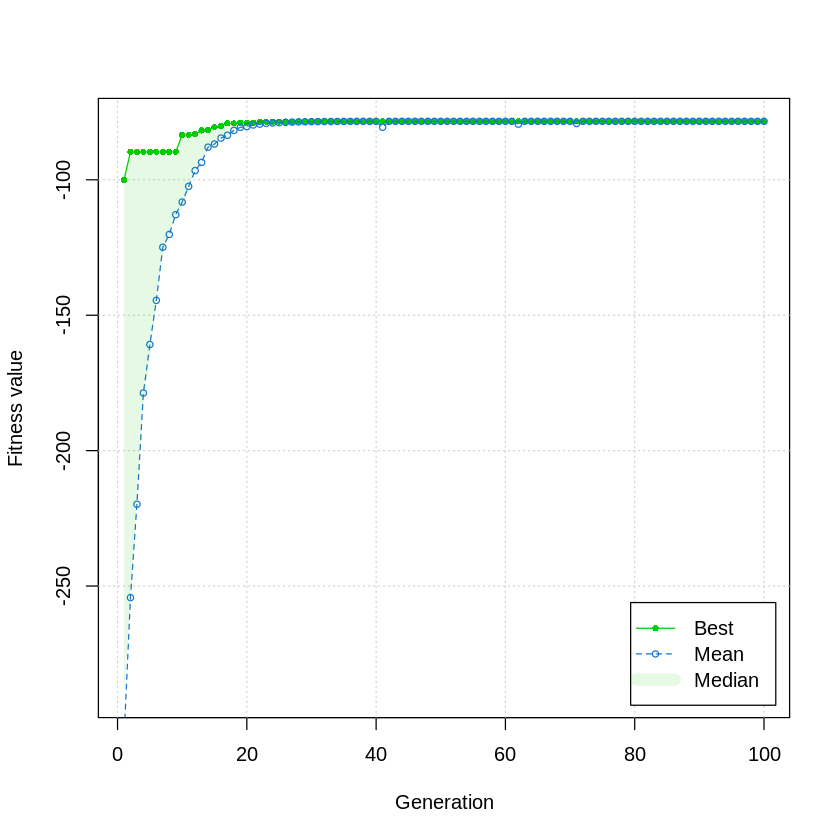

In [15]:
# Run GA
GA <- ga(type = "real-valued",
         fitness = function(x) - function1(x[1],x[2],x[3],x[4]),
         lower = lower_bounds, upper = upper_bounds,
         popSize = 50, pcrossover = 0.75, pmutation = 0.001,
         maxiter = 100, run = 100)

# Plot the optimization results
plot(GA)

In [16]:
summary(GA)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -78.41021 
Solution = 
           x1      x2       x3       x4
[1,] 20.10734 16.4787 1.974799 1.334202

Minimize the cross sectional area and then plot the best and mean fitness values

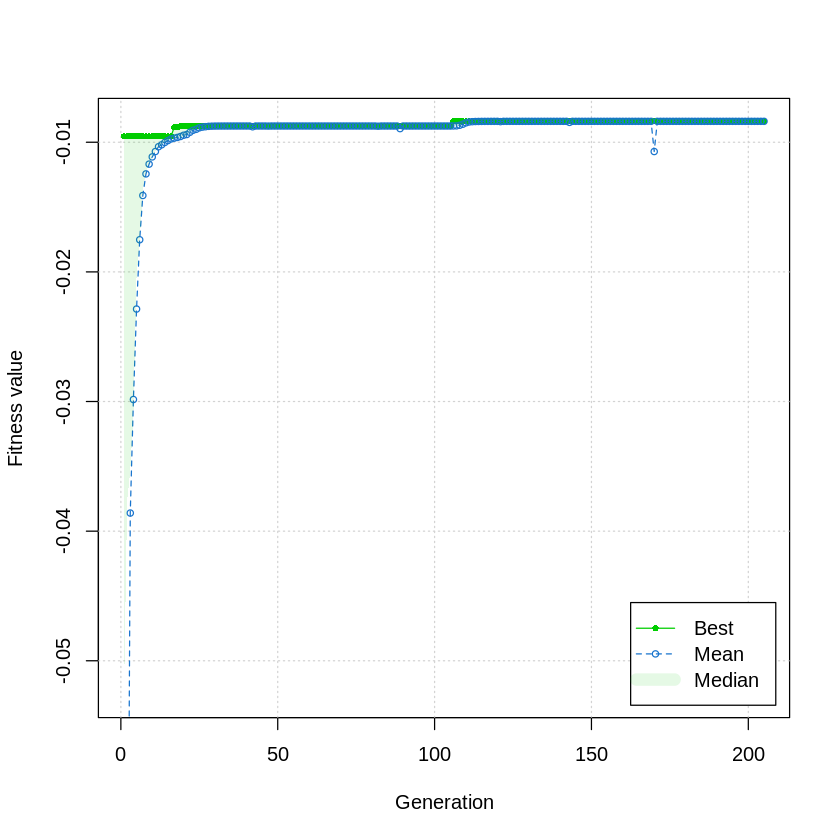

In [18]:
GA2 <- ga(type = "real-valued",
         fitness = function(x) - function2(x[1],x[2],x[3],x[4]),
         lower = lower_bounds, upper = upper_bounds,
         popSize = 50, pcrossover = 0.75, pmutation = 0.001,
         maxiter = 10000, run = 100)

# Plot the optimization results
plot(GA2)
summary (GA2)

Minimize A, which is the static function of the cross sectional area of the beam. Plot the best and mean fitness values that result

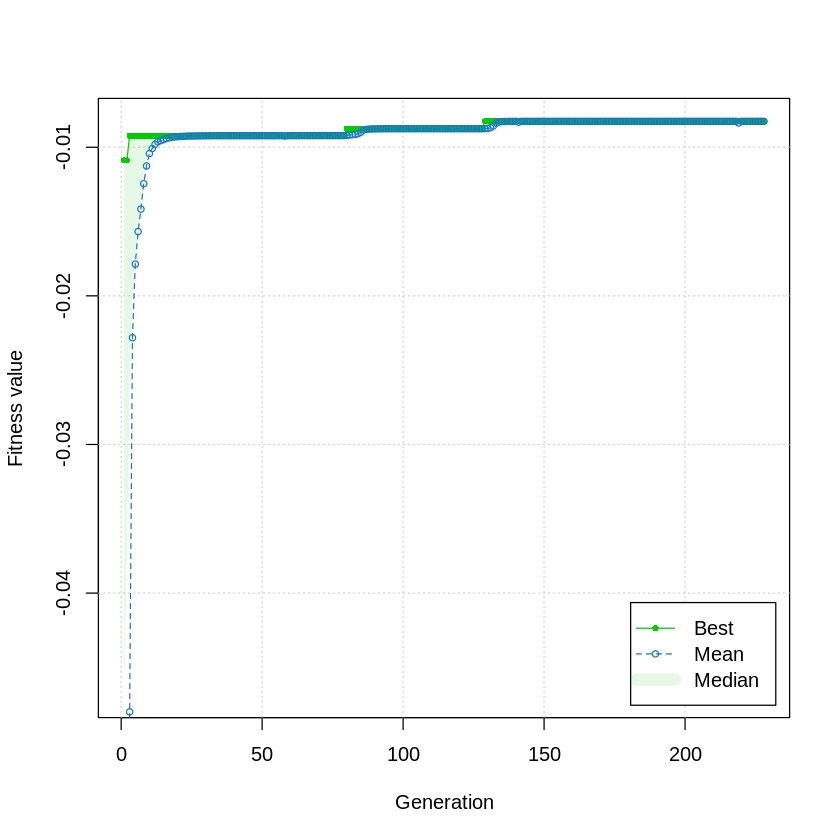

In [19]:
a = 0
function3 <- function(x1,x2,x3,x4,a) {
  (a * function1(x1,x2,x3,x4)) + ((1-a) * function2(x1,x2,x3,x4))
}
GA3 <- ga(type = "real-valued",
         fitness = function(x) - function3(x[1],x[2],x[3],x[4]),
         lower = lower_bounds, upper = upper_bounds,
         popSize = 50, pcrossover = 0.75, pmutation = 0.001,
         maxiter = 10000, run = 100)

# Plot the optimization results
plot(GA3)
summary(GA3)

Now I am going to minimize the full function and plot the best and mean fitness values when a = 0.5 and the full function is minimized

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  10000 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -0.01075055 
Solution = 
           x1       x2       x3       x4
[1,] 65.81379 47.61308 3.445071 4.626562

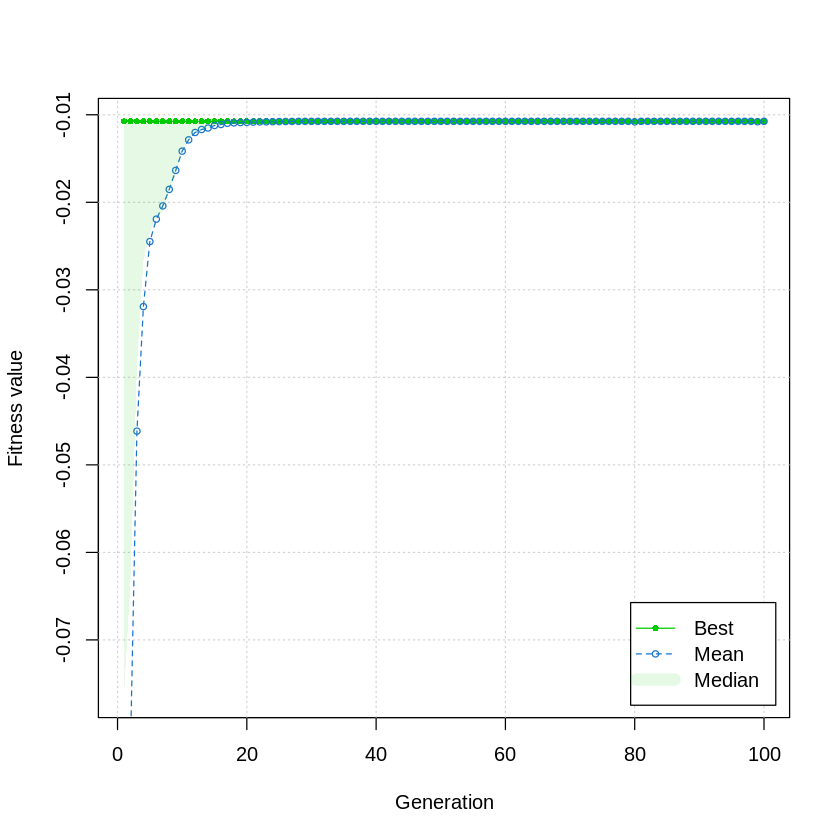

In [20]:
a = 0.5
function4 <- function(x1,x2,x3,x4,a) {
  (a * function1(x1,x2,x3,x4)) + ((1-a) * function2(x1,x2,x3,x4))
}
GA4 <- ga(type = "real-valued",
         fitness = function(x) - function4(x[1],x[2],x[3],x[4]),
         lower = lower_bounds, upper = upper_bounds,
         popSize = 50, pcrossover = 0.75, pmutation = 0.001,
         maxiter = 10000, run = 100)

# Plot the optimization results
plot(GA4)

summary(GA4)

In conclusion, after an analysis of minimizing both functions individually I tested different weights on each function. I have decided on fitting weights (a and b) to minimize the function and get the best fit